In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/PCACS/PCACS ACADEMICS/Practicals and assignments/sem2/ai driven libraries/ca2/Cars quantitative data - Sheet1 (1).csv')
display(df.head())

,COMPANY_NAME,TYPE,SUB TYPE,NAME,HEIGHT,WIDTH,LENGTH,WEIGHT,WHEELBASE,ENGLINE,DISPLACEMENT,GROUND_CLEARANCE,BOOT_SPACE
0,maruti suzuki,subcompact car,NaN,Swift (AOL - 4th Gen),150.0,174.0,386.0,949,245.0,1.2,1197.0,16.3,265.0
1,maruti suzuki,hatchback car,NaN,Wagon R,167.5,162.0,365.5,845,243.5,1.2,1197.0,17.0,341.0
2,maruti suzuki,SUV,NaN,Brezza,168.5,179.0,399.5,1210,250.0,1.5,1462.0,19.8,328.0
3,maruti suzuki,hatchback car,NaN,Ignis,159.5,169.0,370.0,850,243.5,1.2,1197.0,18.0,260.0
4,maruti suzuki,hatchback car,NaN,Alto K10,152.0,149.0,353.0,765,238.0,1.0,998.0,16.7,214.0


In [ ]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
df = df.rename(columns={'engline': 'engine'})
df['company_name'] = df['company_name'].str.strip().str.title()
df['type'] = df['type'].str.lower()
df['sub_type'] = df['sub_type'].str.upper()

In [ ]:
df.columns

Index(['company_name', 'type', 'sub_type', 'name', 'height', 'width', 'length',
       'weight', 'wheelbase', 'engine', 'displacement', 'ground_clearance',
       'boot_space'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company_name      102 non-null    object 
 1   type              102 non-null    object 
 2   sub_type          56 non-null     object 
 3   name              102 non-null    object 
 4   height            102 non-null    float64
 5   width             102 non-null    float64
 6   length            102 non-null    float64
 7   weight            102 non-null    int64  
 8   wheelbase         102 non-null    float64
 9   engine            90 non-null     float64
 10  displacement      90 non-null     float64
 11  ground_clearance  102 non-null    float64
 12  boot_space        95 non-null     float64
dtypes: float64(8), int64(1), object(4)
memory usage: 10.5+ KB


In [ ]:
df.describe()

,height,width,length,weight,wheelbase,engine,displacement,ground_clearance,boot_space
count,102.000000,102.000000,102.000000,102.000000,102.000000,90.000000,90.000000,102.000000,95.000000
mean,161.700980,182.122549,482.635294,1502.156863,268.432353,1.834444,1824.322222,17.907843,420.884211
std,14.972427,11.754274,448.000501,438.058130,22.158038,0.771131,766.475794,2.669694,154.893983
min,123.500000,149.000000,269.500000,610.000000,172.000000,0.800000,799.000000,10.000000,84.000000
25%,149.325000,175.625000,399.500000,1176.250000,252.250000,1.200000,1199.000000,16.300000,313.500000
50%,162.150000,182.000000,441.950000,1492.500000,267.300000,2.000000,1962.000000,18.000000,400.000000
75%,170.000000,189.000000,471.525000,1806.250000,280.600000,2.000000,1997.750000,19.725000,513.500000
max,199.500000,222.000000,4939.000000,2509.000000,321.600000,5.000000,5000.000000,25.200000,898.000000


# A

In [ ]:
df.shape

(102, 13)

In [ ]:
#A1
print("% of data null for each column : ")
(df.isnull().sum() / len(df)) * 100

% of data null for each column : 


,0
company_name,0.000000
type,0.000000
sub_type,45.098039
name,0.000000
height,0.000000
width,0.000000
length,0.000000
weight,0.000000
wheelbase,0.000000
engine,11.764706


In [ ]:
df.duplicated().sum()

np.int64(0)

a2. Missing values in the SUB TYPE column should be filled as "Not Applicable"
    rather than dropped. SUB TYPE is a categorical variable, and in many cases,
    certain vehicles do not logically require a sub-type or do not belong to any
    specific sub-category. Leaving these entries empty or removing such rows
    would lead to unnecessary loss of valid data from the dataset. Assigning
    "Not Applicable" preserves all observations while clearly indicating that
    the absence of a sub-type is intentional and meaningful, rather than an
    error or missing information.

In [ ]:
#A2
df['sub_type'] = df['sub_type'].fillna('not applicable')

a3. Median imputation is used for BOOT SPACE because it is a continuous numerical
    variable and its distribution is usually skewed due to large differences
    between vehicle types (e.g., hatchbacks, sedans, SUVs). Extreme values from
    larger vehicles can distort the mean, making it an unreliable choice. Mode
    is unsuitable since continuous values rarely repeat. The median is robust to
    outliers and better represents a typical boot space value.

In [ ]:
#A3
df['boot_space'] = df['boot_space'].fillna(df['boot_space'].median())

In [ ]:
# Median imputation for engine and displacement
df['engine'] = df['engine'].fillna(df['engine'].median())
df['displacement'] = df['displacement'].fillna(df['displacement'].median())

Missing values in the ENGINE and DISPLACEMENT columns are imputed using the
    median across the entire dataset, including electric vehicles (EVs). Although
    EVs do not possess a conventional engine or displacement, imputing these values
    enables consistent numerical comparisons across all vehicle types. In practical
    analytical and market contexts, EVs are often compared with internal combustion
    vehicles using equivalent engine or displacement benchmarks to aid interpretation.
    Applying a uniform median-based imputation avoids unnecessary data loss and
    prevents over-complication of the analysis while maintaining statistical
    robustness against outliers.

In [ ]:
print("% of data null for each column : ")
(df.isnull().sum() / len(df)) * 100

% of data null for each column : 


,0
company_name,0.0
type,0.0
sub_type,0.0
name,0.0
height,0.0
width,0.0
length,0.0
weight,0.0
wheelbase,0.0
engine,0.0


In [ ]:
#A4
# Company / categorical checks
assert df['company_name'].notna().all()
assert df['type'].notna().all()
assert df['name'].notna().all()
# Dimensional consistency checks
assert (df['height'] > 0).all()
assert (df['width'] > 0).all()
assert (df['length'] > 0).all()
assert (df['wheelbase'] > 0).all()
assert (df['wheelbase'] < df['length']).all()
# Weight check
assert (df['weight'] > 0).all()
# Engine & displacement checks
assert (df['engine'] > 0).all()
assert (df['displacement'] > 0).all()
# Ground clearance & boot space
assert (df['ground_clearance'] > 0).all()
assert (df['boot_space'] >= 0).all()

a4. lack of output simply confirms that the
dataset already meets the defined physical and logical constraints. No further
checks are required unless new validation rules are introduced.

In [ ]:
#a5
df.shape

(102, 13)

a5. Since all missing values in the dataset were handled through imputation rather than row deletion, the total row count remains unchanged after the cleaning process. Missing values were present only in the engine, displacement, sub_type, and boot_space columns, and these were filled using appropriate strategies (median imputation for numerical variables and categorical labeling for sub_type). No columns or rows were dropped during the process.

Maintaining the original row count ensures that no information is lost, preserving the representativeness of the dataset across different vehicle types, including electric vehicles. This approach prevents potential bias that could arise from removing rows with missing values, particularly if those rows correspond to specific categories. As a result, subsequent analysis remains statistically stable, comparable, and interpretable, while still addressing data completeness and consistency requirements.

# B

In [ ]:
#b6
#average height, width, and length of vehicles grouped by COMPANY NAME.
avg_dimensions = (
    df.groupby('company_name')[['height', 'width', 'length']]
      .mean()
      .reset_index()).round(2)
avg_dimensions

,company_name,height,width,length
0,Audi,153.89,187.46,1107.77
1,Bmw,152.70,188.98,490.02
2,Byd,159.00,187.00,444.50
3,Chevrolet,134.10,191.70,478.40
4,Citroen,153.00,167.70,376.90
5,Ford,138.40,191.60,478.40
6,Honda,157.02,174.42,420.72
7,Hyundai,162.80,180.50,430.32
8,Jaguar,130.80,192.30,447.00
9,Jeep,186.80,189.40,488.20


In [ ]:
#b7
#average engine displacement for each vehicle TYPE (SUV, hatchback, subcompact).
selected_types = ['suv', 'hatchback car', 'subcompact car']
avg_displacement_by_type = (
    df[df['type'].isin(selected_types)]
      .groupby('type')['displacement']
      .mean()
      .reset_index()).round(2)
avg_displacement_by_type

,type,displacement
0,hatchback car,1278.00
1,subcompact car,1197.00
2,suv,1788.04


In [ ]:
#b8
highest_gc_company = (
    df.groupby('company_name')['ground_clearance']
      .mean()
      .reset_index()
      .sort_values(by='ground_clearance', ascending=False)
      .head(1))
print('company name with highest gound clearance : ',highest_gc_company.iloc[0]['company_name'])

company name with highest gound clearance :  Jeep


In [ ]:
#b9
#the total and average boot space available per company.
boot_space_stats = (
    df.groupby('company_name')['boot_space']
      .agg(
          total_boot_space='sum',
          average_boot_space='mean'
      ).reset_index()).round(2)

boot_space_stats


,company_name,total_boot_space,average_boot_space
0,Audi,2994.0,427.71
1,Bmw,2605.0,521.00
2,Byd,430.0,430.00
3,Chevrolet,257.0,257.00
4,Citroen,240.0,240.00
5,Ford,408.0,408.00
6,Honda,1747.0,436.75
7,Hyundai,1830.0,366.00
8,Jaguar,310.0,310.00
9,Jeep,898.0,898.00


In [ ]:
#b10
#average weight per engine size (IN LTR) category.
engine_bins = [0, 1.2, 1.6, 2.0, 3.0, df['engine'].max()]
engine_labels = [
    '≤1.2L',
    '1.2–1.6L',
    '1.6–2.0L',
    '2.0–3.0L',
    '>3.0L']
df['engine_size_category'] = pd.cut(
    df['engine'],
    bins=engine_bins,
    labels=engine_labels,
    include_lowest=True)
avg_weight_by_engine_size = (
    df.groupby('engine_size_category')['weight']
      .mean()
      .reset_index()
).round(2)
avg_weight_by_engine_size

/tmp/ipython-input-148111482.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('engine_size_category')['weight']


,engine_size_category,weight
0,≤1.2L,1048.04
1,1.2–1.6L,1332.88
2,1.6–2.0L,1650.43
3,2.0–3.0L,2100.33
4,>3.0L,1924.67


In [ ]:
#b11
# top 3 heaviest vehicles within each company using aggregation and ranking.

top_3_heaviest = (
    df.assign(
        weight_rank=df.groupby('company_name')['weight']
                      .rank(method='dense', ascending=False))
    .query('weight_rank <= 3')
    .sort_values(['company_name', 'weight_rank']))
top_3_heaviest[['company_name', 'name', 'weight', 'weight_rank']]


,company_name,name,weight,weight_rank
81,Audi,Q7,2240,1.0
78,Audi,A8,2165,2.0
80,Audi,Q5,1820,3.0
74,Bmw,X5,2200,1.0
69,Bmw,7 Series,1940,2.0
73,Bmw,5 series,1845,3.0
48,Byd,Atto 3,1900,1.0
62,Chevrolet,Camero,1700,1.0
52,Citroen,eC3,1250,1.0
60,Ford,Mustang GT,1730,1.0


# C

In [ ]:
#c12
high_gc_vehicles = df[df['ground_clearance'] > 20]
segment_counts = high_gc_vehicles['type'].value_counts().idxmax()
print("most dominent segment for groud clearance 20cm greater : ",segment_counts)


most dominent segment for groud clearance 20cm greater :  suv


In [ ]:
#c13
print('vehicles that are SUVs with engine capacity ≥ 1.5 L , first 5 rows : \n')
suv_car= df[
    (df['type'] == 'suv') &
    (df['engine'] >= 1.5)
]
display(suv_car.head())
print()
print('the data shape : ',suv_car.shape)

vehicles that are SUVs with engine capacity ≥ 1.5 L , first 5 rows : 



,company_name,type,sub_type,name,height,width,length,weight,wheelbase,engine,displacement,ground_clearance,boot_space,engine_size_category
2,Maruti Suzuki,suv,not applicable,Brezza,168.5,179.0,399.5,1210,250.0,1.5,1462.0,19.8,328.0,1.2–1.6L
7,Maruti Suzuki,suv,OFF ROAD,Jimny,172.0,164.4,389.5,1150,259.0,1.5,1462.0,21.0,208.0,1.2–1.6L
9,Hyundai,suv,not applicable,Creta,163.5,179.0,433.0,1265,261.0,1.5,1493.0,19.0,433.0,1.2–1.6L
11,Hyundai,suv,not applicable,Alcazar,171.0,180.0,456.0,1485,276.0,1.5,1493.0,20.0,180.0,1.2–1.6L
12,Tata Motors,suv,not applicable,Nexon,162.0,180.4,399.5,1346,249.8,1.5,1497.0,20.8,382.0,1.2–1.6L



the data shape :  (39, 14)


In [ ]:
#c14
small_light_cars = df[
    (df['length'] < 400) &
    (df['weight'] < 1000)
]
type_counts = small_light_cars['type'].value_counts().idxmax()
print('cars with length < 400 cm and weight < 1000 kg are mostly of type : ',type_counts)


cars with length < 400 cm and weight < 1000 kg are mostly of type :  hatchback car


In [ ]:
#c15
print(" vehicles that have boot space above the overall average and belong to Tata Motors : \n")
average_boot_space = df['boot_space'].mean()
tata_large_boot = df[
    (df['company_name'] == 'Tata Motors') &
    (df['boot_space'] > average_boot_space)
].sort_values('boot_space', ascending=False)
tata_large_boot


 vehicles that have boot space above the overall average and belong to Tata Motors : 



,company_name,type,sub_type,name,height,width,length,weight,wheelbase,engine,displacement,ground_clearance,boot_space,engine_size_category
66,Tata Motors,suv,CROSSOVER,Curvv,163.0,181.0,430.8,1450,256.0,1.2,1199.0,20.8,500.0,≤1.2L
14,Tata Motors,suv,not applicable,Harrier,171.8,192.2,460.5,1710,274.1,2.0,1956.0,20.5,445.0,1.6–2.0L
15,Tata Motors,suv,LARGE,Safari,179.5,189.4,466.8,1825,274.1,2.0,1956.0,21.0,420.0,1.6–2.0L


# D

/tmp/ipython-input-3012502672.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


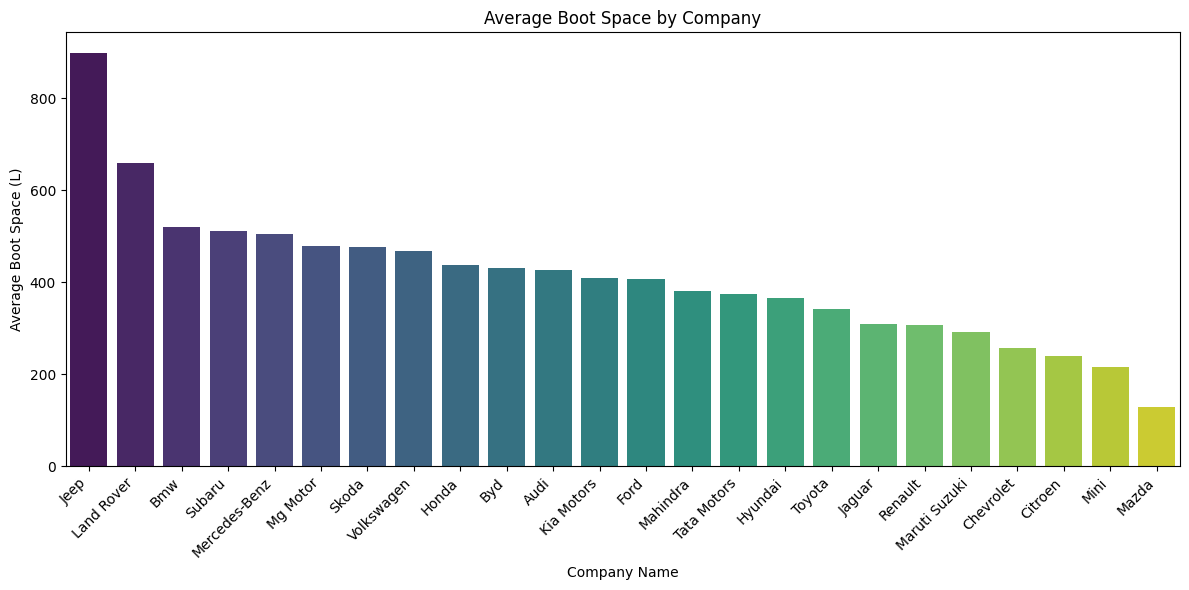

In [ ]:
# d16
#a bar chart showing the average boot space by company
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Average boot space by company
boot_space_avg = df.groupby('company_name')['boot_space'].mean().reset_index()
boot_space_avg = boot_space_avg.sort_values('boot_space', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(
    data=boot_space_avg,
    x='company_name',
    y='boot_space',
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Company Name')
plt.ylabel('Average Boot Space (L)')
plt.title('Average Boot Space by Company')
plt.tight_layout()
plt.show()


d16.  insights : jeep company cars are the ones with the highest boot space and Mazda company offer the lowest boot space  , as per our data.

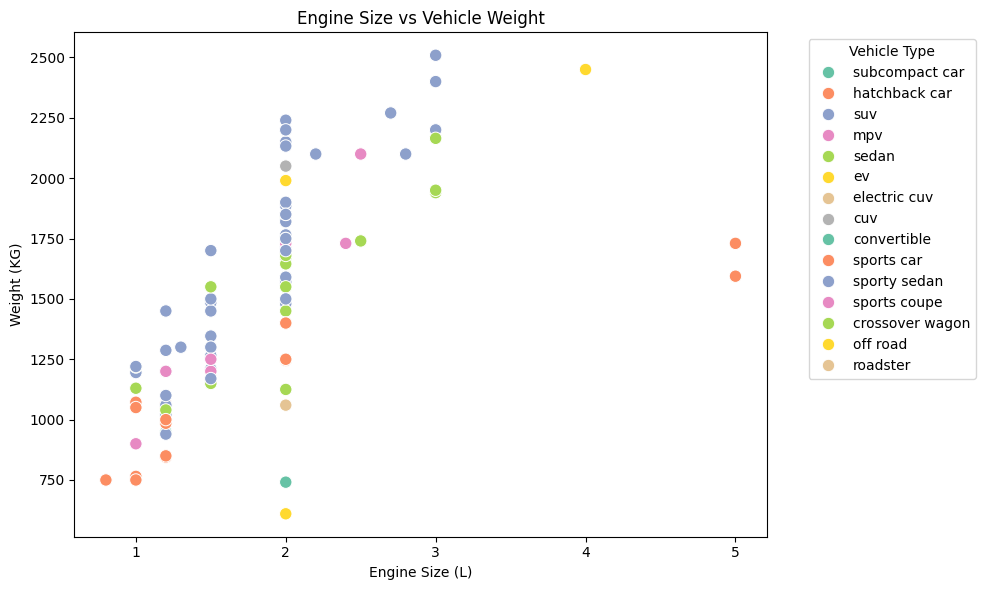

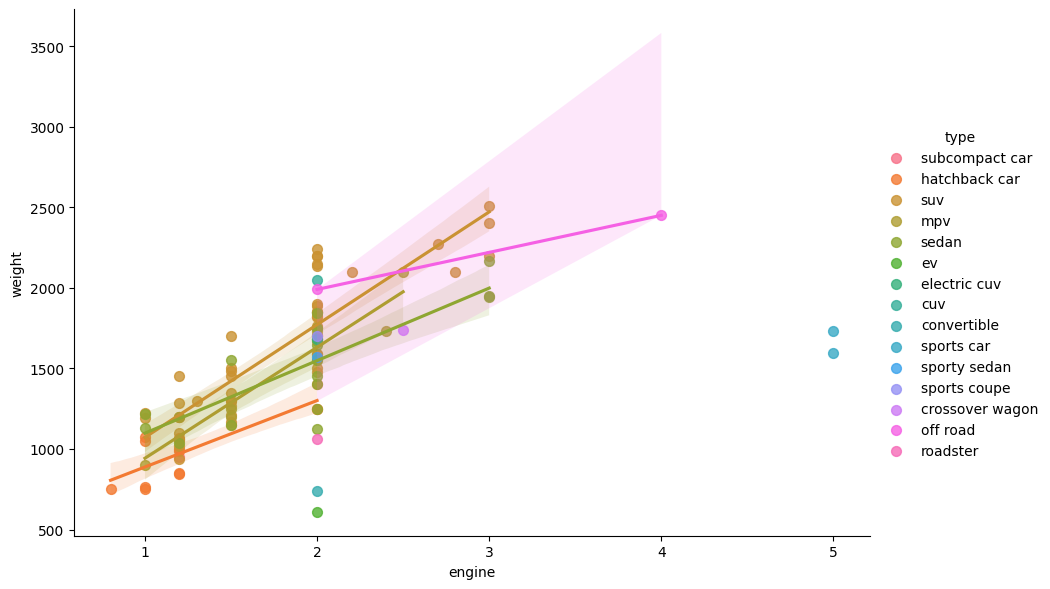

In [ ]:
#d17
#a scatter plot of Engine Size (LTR) vs Weight (KG)

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='engine',
    y='weight',
    hue='type',       # optional: color by vehicle type
    palette='Set2',
    s=80              # marker size
)
plt.xlabel('Engine Size (L)')
plt.ylabel('Weight (KG)')
plt.title('Engine Size vs Vehicle Weight')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
sns.lmplot(data=df, x='engine', y='weight', hue='type', height=6, aspect=1.5, scatter_kws={'s':50})


d17. a visible correlation is seen that weight is directly propotional to the engine

/tmp/ipython-input-1156404516.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


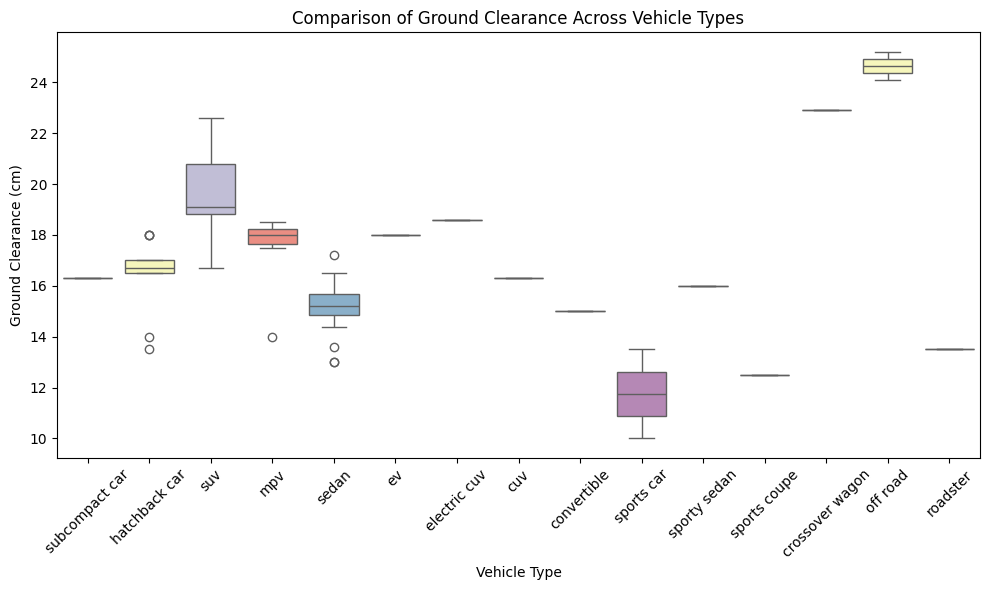

<Figure size 640x480 with 0 Axes>

In [ ]:
#d18
#a box plot to compare ground clearance across vehicle types
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='type',
    y='ground_clearance',
    palette='Set3'
)
plt.xlabel('Vehicle Type')
plt.ylabel('Ground Clearance (cm)')
plt.title('Comparison of Ground Clearance Across Vehicle Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('ground_clearance_by_type.png', dpi=300)


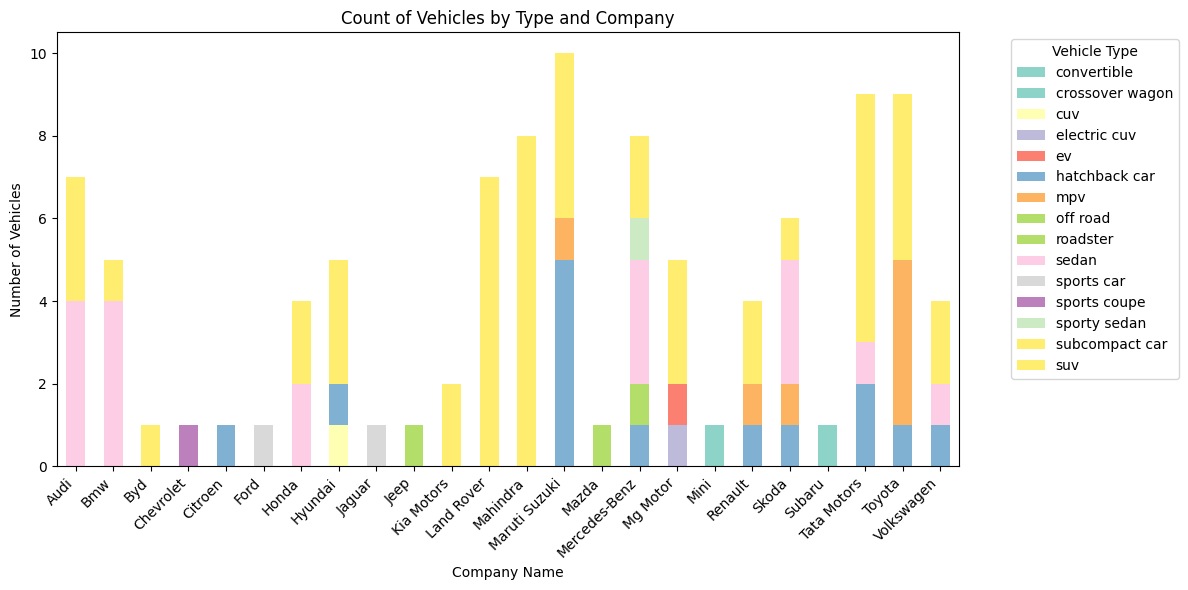

In [ ]:
#d19
#a stacked bar chart showing the count of vehicles by TYPE and COMPANY NAME.

# Create a pivot table: counts of vehicles by company and type
vehicle_counts = df.pivot_table(
    index='company_name',
    columns='type',
    values='name',      # could be any column, just counting rows
    aggfunc='count',
    fill_value=0
)
vehicle_counts.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    colormap='Set3'
)
plt.xlabel('Company Name')
plt.ylabel('Number of Vehicles')
plt.title('Count of Vehicles by Type and Company')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
vehicle_counts = vehicle_counts.loc[vehicle_counts.sum(axis=1).sort_values(ascending=False).index]


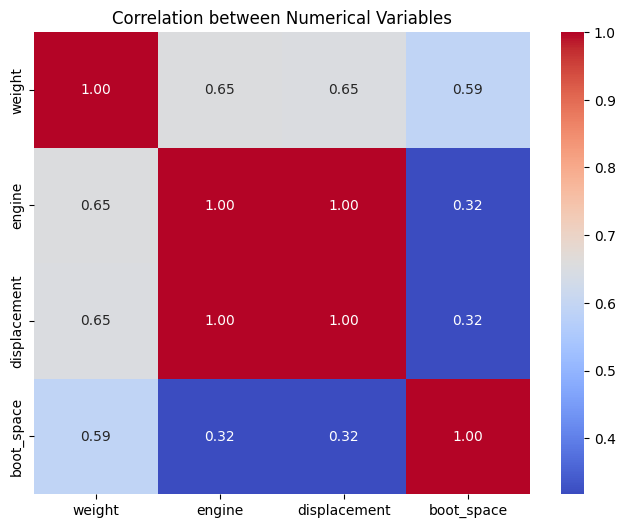

<Axes: >

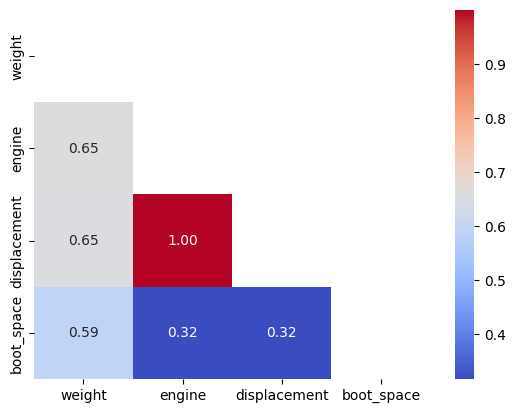

In [ ]:
#d20
#a heatmap showing correlation between numerical variables (weight, engine size, displacement, boot space)

num_cols = ['weight', 'engine', 'displacement', 'boot_space']
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    cbar=True
)
plt.title('Correlation between Numerical Variables')
plt.show()
mask = np.triu(np.ones_like(corr_matrix.round(2), dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)


d20. as we can see, the displacement and engine are strongly correlated as compared to any other pairs !

final conclusion :     




The analysis reveals a distinct segmentation in the automotive market where vehicle specifications strictly correlate with brand positioning and category. After rigorous data cleaning and imputation to ensure consistency , the results demonstrate that SUVs significantly outperform other categories in power potential, averaging a displacement of about 1788 cc compared to the smaller engines found in hatchbacks (about 1278 cc) and subcompact cars. Furthermore, premium and off-road focused brands like Land Rover and Jeep dominate physical dimensions and utility; Jeep secures the highest average ground clearance, validating its off-road capability , while Land Rover leads in practicality with the highest average boot space (about 660 liters) and superior vehicle width. In contrast, mass-market manufacturers like Maruti Suzuki exhibit smaller average dimensions and moderate boot space (about 291 liters), confirming their strategic focus on compactness and urban efficiency rather than raw power or size.